## Spam Detection

In [191]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [192]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [193]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [195]:
# Convert categorical varibale to numerical (1: spam | 0: no spam)
df["Category"] = [1 if each == "spam" else 0 for each in df["Category"]]
df.head(2)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [196]:
# instantiate the vectorizer
vect = CountVectorizer()

# fit & transform training data
X = vect.fit_transform(df.Message)
y = df.Category

In [197]:
# Splite data for test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### 1. Multinomial Naive Bayes Classifier

In [198]:
# Build the model of Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB() 
clf.fit(X_train, y_train)

# Accuracy of module 
print('Accuracy of training model', round(clf.score(X_train, y_train)*100), '%')
print('Accuracy of testing model', round(clf.score(X_test, y_test)*100), '%')

Accuracy of training model 99 %
Accuracy of testing model 98 %


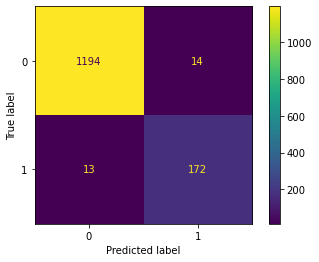

In [199]:
# Confusion matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [200]:
# Prediction
clf_y_pred = clf.predict(X_test)

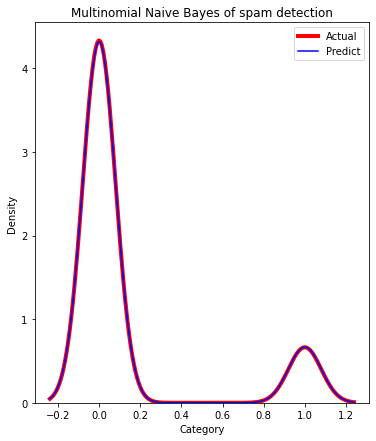

In [201]:
# Visualization of actual vs predict  
plt.figure(figsize = (6, 7))
ax1 = sns.distplot(y_test, hist = False, color = "r", label = "Actual", kde_kws = dict(linewidth = 4))
sns.distplot(clf_y_pred, hist = False, color = "b", label = "Predict", ax = ax1)
plt.title('Multinomial Naive Bayes of spam detection')
ax1.legend()
plt.show()

### 2. Logistic Regression

In [202]:
from sklearn.linear_model import LogisticRegression
loreg_model = LogisticRegression()
loreg_model.fit(X_train, y_train)

# Accuracy of module 
print('Accuracy of training model', round(loreg_model.score(X_train, y_train)*100), '%')
print('Accuracy of testing model', round(loreg_model.score(X_test, y_test)*100), '%')

Accuracy of training model 100 %
Accuracy of testing model 98 %


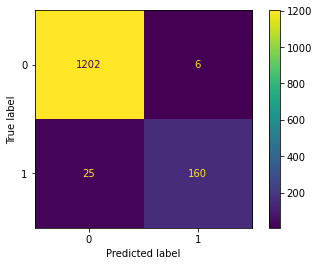

In [203]:
# Confusion matrix
plot_confusion_matrix(loreg_model, X_test, y_test)  
plt.show()

In [204]:
logreg_y_pred = loreg_model.predict(X_test)

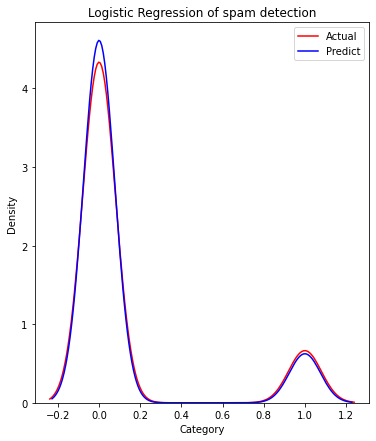

In [205]:
# Visualization of actual vs predict  
plt.figure(figsize = (6, 7))
ax1 = sns.distplot(y_test, hist = False, color = "r", label = "Actual")
sns.distplot(logreg_y_pred, hist = False, color = "b", label = "Predict", ax = ax1)
plt.title('Logistic Regression of spam detection')
ax1.legend()
plt.show()

### 3. Random Forest Classifier

In [206]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(X_train, y_train)

# Accuracy of module 
print('Accuracy of training model', round(rfc_model.score(X_train, y_train)*100), '%')
print('Accuracy of testing model', round(rfc_model.score(X_test, y_test)*100), '%')

Accuracy of training model 100 %
Accuracy of testing model 98 %


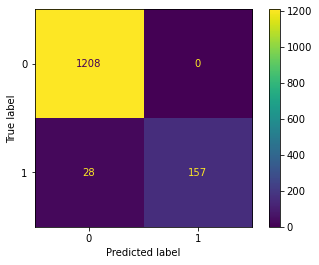

In [207]:
# Confusion matrix
plot_confusion_matrix(rfc_model, X_test, y_test)  
plt.show()

In [208]:
rfc_y_pred = rfc_model.predict(X_test)

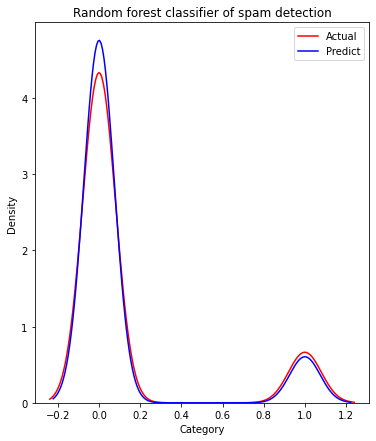

In [209]:
# Visualization of actual vs predict 
plt.figure(figsize = (6, 7))
ax1 = sns.distplot(y_test, hist = False, color = "r", label = "Actual")
sns.distplot(rfc_y_pred, hist = False, color = "b", label = "Predict", ax = ax1)
plt.title('Random forest classifier of spam detection')
ax1.legend()

### 4. Random Forest Regressor

Note: It is not good idea to use Random forest regressor. Beause dataset is categorical data

In [210]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(X_train, y_train)

# Accuracy of module 
print('Accuracy of training model', round(rf_model.score(X_train, y_train)*100), '%')
print('Accuracy of testing model', round(rf_model.score(X_test, y_test)*100), '%')

Accuracy of training model 97 %
Accuracy of testing model 82 %


In [211]:
# Confusion matrix: confusion metrics is not support for this model

In [212]:
rf_y_pred = rf_model.predict(X_test)

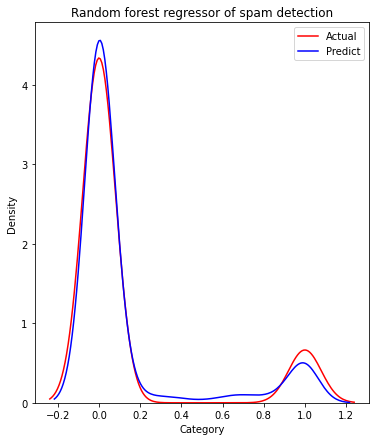

In [213]:
# Visualization of actual vs predict 
plt.figure(figsize = (6, 7))
ax1 = sns.distplot(y_test, hist = False, color = "r", label = "Actual")
sns.distplot(rf_y_pred, hist = False, color = "b", label = "Predict", ax = ax1)
plt.title('Random forest regressor of spam detection')
ax1.legend()

### 5. KNeighbors Classifier

In [214]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier(n_neighbors=3)
kn_model.fit(X_train, y_train)

# Accuracy of module 
print('Accuracy of training model', round(kn_model.score(X_train, y_train)*100), '%')
print('Accuracy of testing model', round(kn_model.score(X_test, y_test)*100), '%')

Accuracy of training model 95 %
Accuracy of testing model 93 %


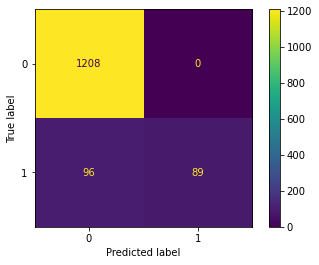

In [215]:
# Confusion matrix
plot_confusion_matrix(kn_model, X_test, y_test)  
plt.show()

In [216]:
kn_y_pred = kn_model.predict(X_test)

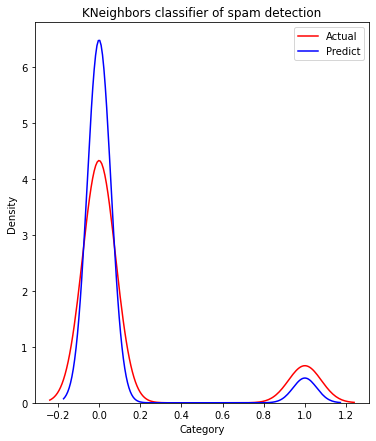

In [217]:
# Visualization of actual vs predict 
plt.figure(figsize = (6, 7))
ax1 = sns.distplot(y_test, hist = False, color = "r", label = "Actual")
sns.distplot(kn_y_pred, hist = False, color = "b", label = "Predict", ax = ax1)
plt.title('KNeighbors classifier of spam detection')
ax1.legend()

### 6. Decision Tree Classifier

In [218]:
from sklearn import tree
dec_model = tree.DecisionTreeClassifier()
dec_model = clf.fit(X_train, y_train)

# Accuracy of module 
print('Accuracy of training model', round(dec_model.score(X_train, y_train)*100), '%')
print('Accuracy of testing model', round(dec_model.score(X_test, y_test)*100), '%')

Accuracy of training model 99 %
Accuracy of testing model 98 %


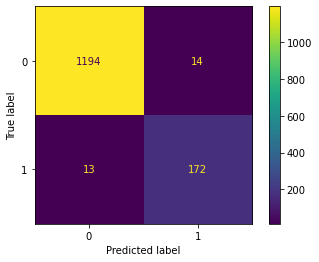

In [219]:
# Confusion matrix
plot_confusion_matrix(dec_model, X_test, y_test)  
plt.show()

In [220]:
dec_y_pred = dec_model.predict(X_test)

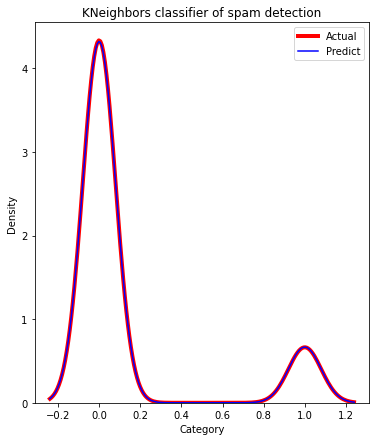

In [221]:
# Visualization of actual vs predict 
plt.figure(figsize = (6, 7))
ax1 = sns.distplot(y_test, hist = False, color = "r", label = "Actual", kde_kws = dict(linewidth = 4))
sns.distplot(dec_y_pred, hist = False, color = "b", label = "Predict", ax = ax1)
plt.title('KNeighbors classifier of spam detection')
ax1.legend()